# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [1]:
import numpy as np

def sq_err(y_real, y_predicted):
    """
    input
    y_real : true y values
    y_predicted : regression line
    
    return
    squared error between regression and true line (ss_tot)
    """
    return np.sum((y_real - y_predicted)**2)

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    mean_y_real = y_real.mean()
    ssr = sq_err(y_real, y_predicted)
    baseline_y = np.full(len(y_real), mean_y_real)
    sst = sq_err(y_real, baseline_y)
    
    r_squared = 1 - (ssr / sst)
    
    return r_squared

def calc_slope(xs,ys):
    """ return the slope of the line described by xs and ys"""
    
    return (xs.mean() * ys.mean() - (xs * ys).mean()) / (xs.mean()**2 - (xs**2).mean())

def best_fit(xs,ys):
    """return the slope and intercept for the line described by xs and ys"""
    
    m = calc_slope(xs, ys)
    c = ys.mean() - m * xs.mean()
    
    return m, c

def reg_line (m, c, xs):
    """
    return the y values for a regression line
    
    input
    m -- slope
    c -- y intercept
    xs -- x values
    """
    
    ys = xs * m + c
    
    return ys

In [4]:
m, c = best_fit(X, Y)
regression_line = reg_line(m, c, X)
r_sq = r_squared(Y, regression_line)
print('Basic Regression Diagnostics')
print('----------------------------')
print(f'Slope: {round(m, 2)}')
print(f'Y-Intercept: {round(c, 2)}')
print(f'R-Squared: {round(r_sq, 2)}')
print('----------------------------')
print(f'Model: Y = {round(m, 2)} * X + {round(c, 2)}')

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

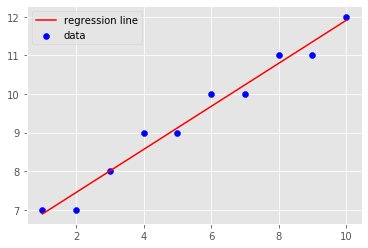

In [8]:
plt.scatter(X, Y, c='blue', label='data')
plt.plot(X, regression_line, c='red', label='regression line')
plt.legend()
plt.show()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


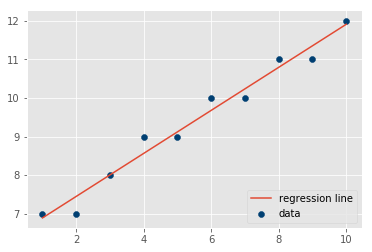

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

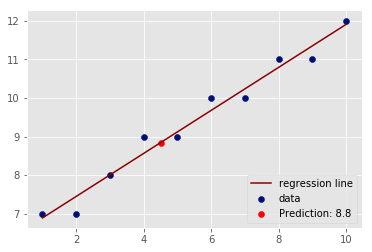

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

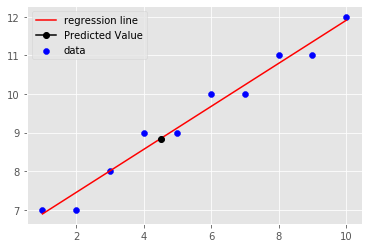

In [9]:
plt.scatter(X, Y, c='blue', label='data')
plt.plot(X, regression_line, c='red', label='regression line')
plt.plot(4.5, reg_line(m, c, 4.5),marker='o', color='black', label='Predicted Value' )
plt.legend()
plt.show()

In [10]:
import pandas as pd
data = pd.read_csv('heightweight.csv')
data.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [12]:
m, c = best_fit(data.height, data.weight)
regression_line = reg_line(m, c, data.height)
r_sq = r_squared(data.weight, regression_line)
print('Basic Regression Diagnostics')
print('----------------------------')
print(f'Slope: {round(m, 2)}')
print(f'Y-Intercept: {round(c, 2)}')
print(f'R-Squared: {round(r_sq, 2)}')
print('----------------------------')
print(f'Model: Y = {round(m, 2)} * X + {round(c, 2)}')

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


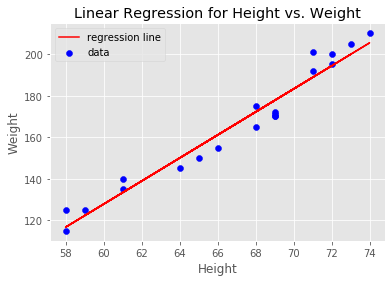

In [13]:
plt.scatter(data.height, data.weight, c='blue', label='data')
plt.plot(data.height, regression_line, c='red', label='regression line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Linear Regression for Height vs. Weight')
plt.legend()
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 